    Position x (mm)  Current (A)  Mean B0 (G)  Deflection x (m)  \
0                 0        0.000          NaN             0.000   
1                 1        0.554          2.8             0.001   
2                 2        1.221          5.6             0.002   
3                 3        1.636          7.2             0.003   
4                 4        2.217          9.4             0.004   
5                 5        2.471         10.3             0.005   
6                 6        2.752         11.7             0.006   
7                 7        2.966         12.8             0.007   
8                 8        3.196         14.0             0.008   
9                 9        3.507         15.6             0.009   
10               10        3.775         17.2             0.010   
11               11        3.921         18.3             0.011   

    Angle α (rad)  Force Fm (N)  Mean B0 (microT)  
0        0.000000      0.000000               NaN  
1        0.001047      0

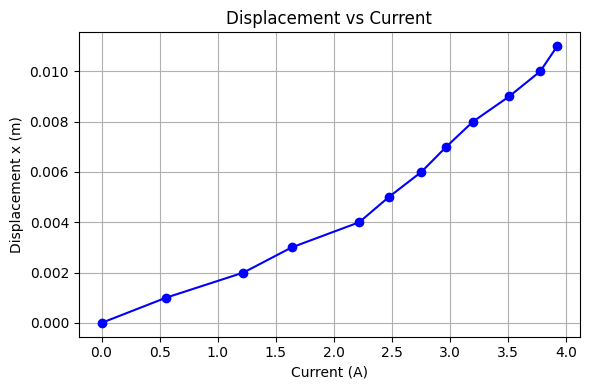

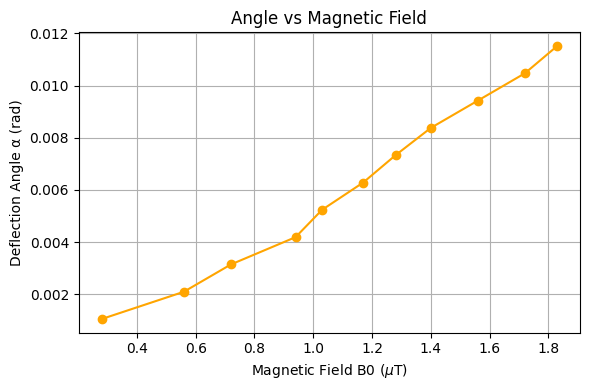

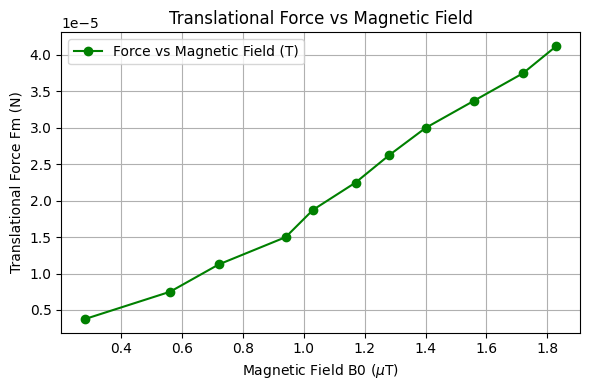

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import atan, degrees
import os
os.makedirs("Assests", exist_ok=True)

# Manually reconstructing the visible portion of the table from the image
# Estimating values based on what appears in the screenshot

# Position (x in mm), Current (I in A), Mean B-field (approx), assuming 0.05 mm uncertainty
positions_mm = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
currents_A = np.array([0, 0.554, 1.221, 1.636, 2.217, 2.471, 2.752, 2.966, 3.196, 3.507, 3.775, 3.921])
mean_B0 = np.array([np.nan, 2.8, 5.6, 7.2, 9.4, 10.3, 11.7, 12.8, 14, 15.6, 17.2, 18.3])  # Approx. mean B0 column

# Pendulum parameters
length_mm = 955  # pendulum length in mm
mass_grams = 0.3648  # object mass in grams

# Convert to SI units
x_m = positions_mm / 1000
L_m = length_mm / 1000
m_kg = mass_grams / 1000
g = 9.81

# Calculate angle (rad), small angle approx: alpha = x / L
alpha_rad = x_m / L_m
# Force estimate
Fm_N = m_kg * g * np.tan(alpha_rad)

# Construct a DataFrame
df = pd.DataFrame({
    "Position x (mm)": positions_mm,
    "Current (A)": currents_A,
    "Mean B0 (G)": mean_B0,
    "Deflection x (m)": x_m,
    "Angle α (rad)": alpha_rad,
    "Force Fm (N)": Fm_N
})

df["Mean B0 (microT)"] = df["Mean B0 (G)"] * 1e-1


print(df)

# 1. Displacement vs Current
plt.figure(figsize=(6, 4))
plt.plot(df["Current (A)"], df["Deflection x (m)"], 'o-', label="x vs I", color="blue")
plt.xlabel("Current (A)")
plt.ylabel("Displacement x (m)")
plt.title("Displacement vs Current")
plt.grid(True)
plt.tight_layout()
plt.savefig("Assests/Displacement_vs_Current.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Angle vs Magnetic Field (Tesla)
plt.figure(figsize=(6, 4))
plt.plot(df["Mean B0 (microT)"], df["Angle α (rad)"], 'o-', label="α vs B0", color="orange")
plt.xlabel(r"Magnetic Field B0 ($\mu$T)")
plt.ylabel("Deflection Angle α (rad)")
plt.title("Angle vs Magnetic Field")
plt.grid(True)
plt.tight_layout()
plt.savefig("Assests/Angle_vs_Field.png", dpi=300, bbox_inches='tight')
plt.show()

# Also plot force vs magnetic field for visualization
plt.figure(figsize=(6,4))
plt.plot(df["Mean B0 (microT)"], df["Force Fm (N)"], 'o-', color='green', label="Force vs Magnetic Field (T)")
plt.xlabel(r"Magnetic Field B0 ($\mu$T)")
plt.ylabel("Translational Force Fm (N)")
plt.title("Translational Force vs Magnetic Field")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Assests/Force_vs_Field.png", dpi=300, bbox_inches='tight')
plt.show()
